In [1]:
import sys
import os

project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

plt.style.use('ggplot')

%config InlineBackend.figure_formats = ['svg']


from catan.core import Game
from catan.core.models.player import RandomPlayer, Color, Player

### Measure win rates

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.02,  0.03,  0.08,  0.13,  0.18,  0.23,  0.28,  0.33,  0.38,
         0.43,  0.48,  0.53,  0.58,  0.63,  0.68,  0.73,  0.78,  0.83,
         0.88,  0.93,  0.98]),
 <BarContainer object of 20 artists>)

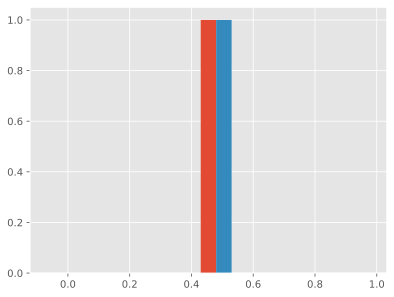

In [3]:

rand_2_players = [
    RandomPlayer(color=Color.BLUE, is_bot=True),
    RandomPlayer(color=Color.RED, is_bot=True)
]

def playout(players):
    game = Game(players=players)
    game.play()
    
    return (game.state.num_turns, game.winning_color())


def win_rate(expected_winner_color, players, n_playouts):
    wins = 0
    
    for i in range(n_playouts):
        _, winner_color = playout(players)
        if winner_color == expected_winner_color:
            wins += 1
            
    return wins / n_playouts

def players_benchmark(players, n_playouts = 100, plt = True):
    pass




plt.hist(
    win_rate(Color.RED, rand_2_players, 100), 
    bins=20)
plt.hist(
    win_rate(Color.BLUE, rand_2_players, 100), 
    bins=20)


In [4]:
# def n_playout_steps(players, n_playouts):
#     return [playout(players)[0] for _ in range(n_playouts)]

# fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, layout='constrained')

# ax0.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE), 
#     ], 300),
#     alpha=0.8,
#     bins=30,
# )
# ax0.set_title("1 random player")

# ax1.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax1.set_title("2 random players")

# ax2.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#         RandomPlayer(color=Color.ORANGE),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax2.set_title("3 random players")

# ax3.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#         RandomPlayer(color=Color.ORANGE),
#         RandomPlayer(color=Color.WHITE),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax3.set_title("4 random players")

# plt.show()

### MCTS scheme

TODO
- Prune building settlements from initial steps, pick only the most promising ones

In [13]:
import catan.bots.mcts as mcts


class MCTSPlayer(Player):
    def __init__(self, color, n_simulations=100):
        super().__init__(color, is_bot = True)
        
        self.n_simulations = n_simulations


    def decide(self, game, playable_actions):
        mcts_root = mcts.MCTSNode(game=game.copy(), color=self.color)
        mcts_root.run_playouts(n_simulations=self.n_simulations)
        best_action = mcts_root.find_best_action()
    
        
        return best_action



n = np.arange(10, 50, 10)


game = Game(
    players=[
        RandomPlayer(color=Color.RED, is_bot=True),
        MCTSPlayer(color=Color.BLUE, n_simulations=10),
    ]
)
game.play()

<Color.RED: 'RED'>

In [14]:
print(
    game.state.players,
    game.winning_color(),
    game.state.num_turns
)

[MCTSPlayer:BLUE, RandomPlayer:RED] Color.RED 261


In [15]:
game.state.player_state

{'P0_VICTORY_POINTS': 2,
 'P0_ROADS_AVAILABLE': 11,
 'P0_SETTLEMENTS_AVAILABLE': 3,
 'P0_CITIES_AVAILABLE': 4,
 'P0_HAS_ROAD': False,
 'P0_HAS_ARMY': False,
 'P0_HAS_ROLLED': False,
 'P0_HAS_PLAYED_DEVELOPMENT_CARD_IN_TURN': False,
 'P0_ACTUAL_VICTORY_POINTS': 2,
 'P0_LONGEST_ROAD_LENGTH': 3,
 'P0_KNIGHT_OWNED_AT_START': False,
 'P0_MONOPOLY_OWNED_AT_START': False,
 'P0_YEAR_OF_PLENTY_OWNED_AT_START': False,
 'P0_ROAD_BUILDING_OWNED_AT_START': False,
 'P0_WOOD_IN_HAND': 0,
 'P0_BRICK_IN_HAND': 0,
 'P0_SHEEP_IN_HAND': 3,
 'P0_WHEAT_IN_HAND': 0,
 'P0_ORE_IN_HAND': 2,
 'P0_KNIGHT_IN_HAND': 0,
 'P0_PLAYED_KNIGHT': 0,
 'P0_YEAR_OF_PLENTY_IN_HAND': 0,
 'P0_PLAYED_YEAR_OF_PLENTY': 0,
 'P0_MONOPOLY_IN_HAND': 0,
 'P0_PLAYED_MONOPOLY': 0,
 'P0_ROAD_BUILDING_IN_HAND': 0,
 'P0_PLAYED_ROAD_BUILDING': 0,
 'P0_VICTORY_POINT_IN_HAND': 0,
 'P0_PLAYED_VICTORY_POINT': 0,
 'P1_VICTORY_POINTS': 11,
 'P1_ROADS_AVAILABLE': 0,
 'P1_SETTLEMENTS_AVAILABLE': 0,
 'P1_CITIES_AVAILABLE': 3,
 'P1_HAS_ROAD': True,
 '

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Action Frequencies per Player'}, xlabel='Type of Action', ylabel='Frequency of Actions'>)

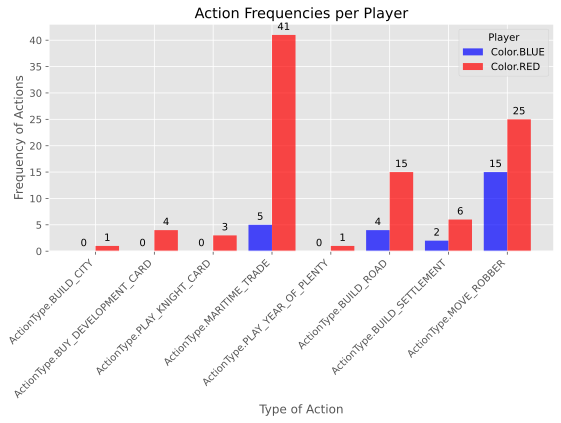

In [16]:
from catan.core.models.enums import ActionType
from plot_utils import plot_action_freqs


plot_action_freqs(
    game.state.actions, 
    exclusions=[ActionType.ROLL, ActionType.END_TURN]
)